## Setup

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt


##  Data processing - modify the features 

In [5]:
apple = pd.read_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\OLS_df.csv', index_col=0)
apple

,Adj Close,Volume,Return,Return_tomo
1980-12-13,0.099058,469033600.0,0.000000,0.000000
1980-12-14,0.099058,469033600.0,0.000000,-0.052171
1980-12-15,0.093890,175884800.0,-0.052171,-0.073398
1980-12-16,0.086998,105728000.0,-0.073398,0.024751
1980-12-17,0.089152,86441600.0,0.024751,0.028992
...,...,...,...,...
2024-05-18,189.869995,41282900.0,0.000000,0.000000
2024-05-19,189.869995,41282900.0,0.000000,0.006162
2024-05-20,191.039993,44361300.0,0.006162,0.006857
2024-05-21,192.350006,42309400.0,0.006857,-0.007538


In [4]:
apple['Return-1'] = apple['Return'].shift(1)
apple['Return-2'] = apple['Return'].shift(2)
apple['Return-3'] = apple['Return'].shift(3)
apple['Return-4'] = apple['Return'].shift(4)
display(apple)   # Now we have in total 5 features which indicates the five days ahead features. 

,Adj Close,Volume,Return,Return_tomo,Return-1,Return-2,Return-3,Return-4
1980-12-13,0.099058,469033600.0,0.000000,0.000000,NaN,NaN,NaN,NaN
1980-12-14,0.099058,469033600.0,0.000000,-0.052171,0.000000,NaN,NaN,NaN
1980-12-15,0.093890,175884800.0,-0.052171,-0.073398,0.000000,0.000000,NaN,NaN
1980-12-16,0.086998,105728000.0,-0.073398,0.024751,-0.052171,0.000000,0.000000,NaN
1980-12-17,0.089152,86441600.0,0.024751,0.028992,-0.073398,-0.052171,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2024-05-18,189.869995,41282900.0,0.000000,0.000000,0.000158,0.000632,0.012218,0.006173
2024-05-19,189.869995,41282900.0,0.000000,0.006162,0.000000,0.000158,0.000632,0.012218
2024-05-20,191.039993,44361300.0,0.006162,0.006857,0.000000,0.000000,0.000158,0.000632
2024-05-21,192.350006,42309400.0,0.006857,-0.007538,0.006162,0.000000,0.000000,0.000158


In [10]:
# Drop the null values 
apple = apple.dropna(axis=0)

In [11]:
# Split X and y 
X = apple.drop(columns=['Adj Close', 'Volume', 'Return_tomo'], axis=1)
y = apple['Return_tomo']

display(X)
display(y)

,Return,Return-1,Return-2,Return-3,Return-4
1980-12-17,0.024751,-0.073398,-0.052171,0.000000,0.000000
1980-12-18,0.028992,0.024751,-0.073398,-0.052171,0.000000
1980-12-19,0.061029,0.028992,0.024751,-0.073398,-0.052171
1980-12-20,0.000000,0.061029,0.028992,0.024751,-0.073398
1980-12-21,0.000000,0.000000,0.061029,0.028992,0.024751
...,...,...,...,...,...
2024-05-18,0.000000,0.000158,0.000632,0.012218,0.006173
2024-05-19,0.000000,0.000000,0.000158,0.000632,0.012218
2024-05-20,0.006162,0.000000,0.000000,0.000158,0.000632
2024-05-21,0.006857,0.006162,0.000000,0.000000,0.000158


1980-12-17    0.028992
1980-12-18    0.061029
1980-12-19    0.000000
1980-12-20    0.000000
1980-12-21    0.048670
                ...   
2024-05-18    0.000000
2024-05-19    0.006162
2024-05-20    0.006857
2024-05-21   -0.007538
2024-05-22   -0.021058
Name: Return_tomo, Length: 15863, dtype: float64

In [13]:
# Split the train_test set 

train_size = int((X.shape[0])*0.8)   # train size = 0.8



X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [ ]:
# We do not apply the scaler here as all the data are in the same scale. 

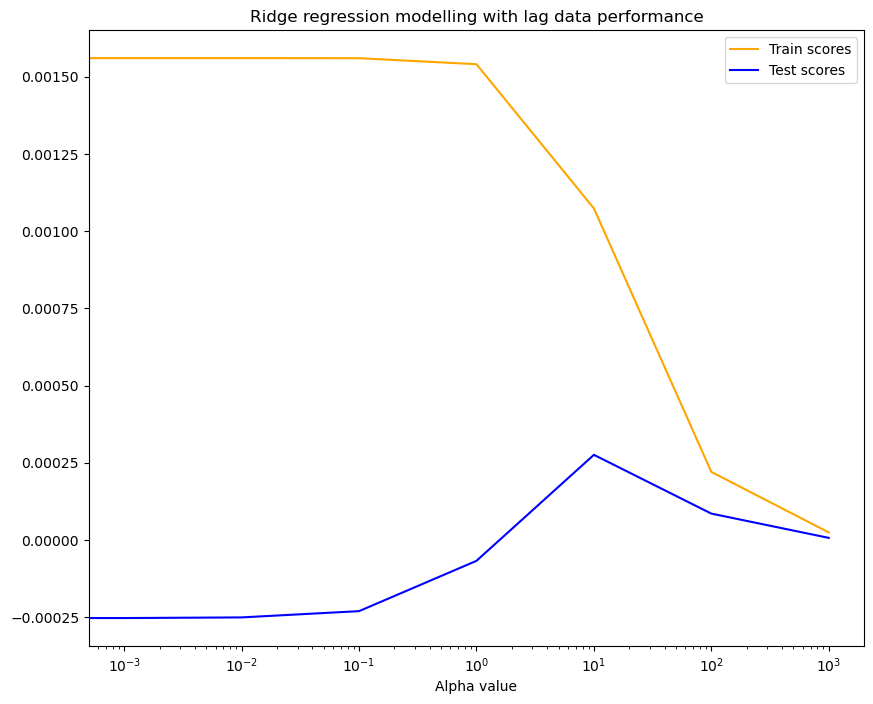

In [20]:
# We apply the regression model: linear regression without the regularization and with the regularization 

from sklearn.linear_model import Ridge

alpha_list = [0, 0.001,0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for a in alpha_list:
    linear_model = Ridge(alpha=a)
    linear_model.fit(X_train, y_train)

    train_scores.append(linear_model.score(X_train, y_train))
    test_scores.append(linear_model.score(X_test, y_test))

plt.figure(figsize=(10,8))
plt.plot(alpha_list, train_scores, label = 'Train scores', color = 'orange')
plt.plot(alpha_list, test_scores, label = 'Test scores', color = 'blue')
plt.title('Ridge regression modelling with lag data performance')
plt.xlabel('Alpha value')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
# Now we try to make the classification based on the regression result.

In [ ]:
alpha_list = [0, 0.001,0.01, 0.1, 1, 10, 100, 1000]

Return_tomo_real_train = np.where(y_train > 0, 1, 0)
Return_tomo_real_test = np.where(y_test >0, 1, 0)


class_accurancy_train = []
class_accurancy_test = []

for a in alpha_list:
    linear_model = Ridge(alpha=a)
    linear_model.fit(X_train, y_train)

    y_train_predict = np.where(linear_model.predict(X_train)>0, 1, 0)
    y_test_predict = np.where(linear_model.predict(X_test)>0, 1, 0)

    class_accurancy_train.append((y_train_predict == Return_tomo_real_train).mean())
    class_accurancy_test.append((y_train_predict == Return_tomo_real_train).mean())

plt.figure(figsize=(10,8))
plt.plot(alpha_list, train_scores, label = 'Train scores', color = 'orange')
plt.plot(alpha_list, test_scores, label = 'Test scores', color = 'blue')
plt.title('Ridge regression modelling with lag data performance')
plt.xlabel('Alpha value')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
# Now we try to use the linear classification algo: Logistic regression, the regularization term we apply is L2 as all the features are resonable features.
# We do not want to eliminate the features. 

##  Determine the optimized lagged days. 

In [6]:
# How to decide the best lagged days at this point, I would fix the alpha value. 


# Function to create lagged features
def create_lagged_features(df, max_lag):
    for lag in range(1, max_lag + 1):
        df[f'lag_{lag}'] = df['Value'].shift(lag)
    df.dropna(inplace=True)  # Drop rows with NaN values created by shifting
    return df

# Applying the function to create lag features from 1 to 10 days
max_lag = 10
data_lagged = create_lagged_features(apple.copy(), max_lag)

# Define the features and target variable
X = data_lagged.drop(columns=['Adj Close', 'Volume', 'Return_tomo'], axis=1)
y = data_lagged['Return_tomo']


# Splitting the dataset into training and testing sets
train_size = int((X.shape[0])*0.8)   # train size = 0.8

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]



# Ridge Regression model training and evaluation
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for alpha in alpha_list:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(alpha_list, train_scores, label='Train Scores', marker='o', color='blue')
plt.plot(alpha_list, test_scores, label='Test Scores', marker='o', color='red')
plt.title('Ridge Regression Performance with Lagged Data')
plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('R^2 Score')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Value'